# Midterm Project

For the midterm project you'll get to practice the data science process by trying out a regression problem! You'll then get to compare your model performance to other peers' work on the same dataset as well as work on several other datasets. This will allow you to see new ideas on the same problem as well as nuances of the same technique across different datasets. 

# Datasets

You will take one of the following datasets and apply a standard data science process of exploratory analysis, cleaning and machine learning. This process will be outlined in several large stages. To start, take your dataset, import the data and begin doing some initial exploratory analysis using the tools and techniques we have covered thus far. You will find all three datasets under a folder titled 'Datasets'.


* Walmart Sales Forecasting
* Estimating NYC Cab Trip Duration
* Lego Sets (previously seen)

## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

In [2]:
#import all the stuff you need to make charts, graphs etc.

# Load the Data

In [3]:
import pandas as pd
import plotnine
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [4]:
#load weekly sales forcasting and features ....see  below

In [5]:
df = pd.read_csv('./Datasets/Walmart_Sales_Forecasting.csv')
print(len(df))
df.head(10)
                        

421570


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [6]:
df2 = pd.read_csv('./Datasets/features.csv')
print(len(df2))
df2.head(10)
                        

8190


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
#we need to merge the 2 dataframes...  so we try final = pd.merge(df, df2,) 
# ...if you do it with final= pd.merge(df, df2) it will have an extra colums that are repeated for example
# you will have an 
# IsHoliday column called IsHoliday_X  and
# IsHolday_Y becuase IsHoliday came from both datasets
# the code below is better since you are combining them on store and date


In [8]:
final= pd.merge(df[['Store','Date','Dept','Weekly_Sales']],
                df2, 
                on=['Store','Date'])#when merging 2 data frames ,
#               in order to  merge properly the  dataframes both have to have columns that are
#              'Store' and 'Date' or it wont work then you have to use left merge on or right merge 


In [9]:
final = final.dropna()# This drops the 'nan' that are in collums when we have missing data
#            .fillna()  You can also use fillna() to fill in nan values with a 0 instead of dropping the nan
final.head()

,Store,Date,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6587,1,2011-11-11,1,18689.54,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
6588,1,2011-11-11,2,44936.47,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
6589,1,2011-11-11,3,9959.64,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
6590,1,2011-11-11,4,36826.52,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
6591,1,2011-11-11,5,31002.65,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False


In [10]:
final.shape# want to check how many rows and columns there are 

(97056, 14)

# Exploratory Data Analysis

In [11]:
# check 3 different vairables for correlation  markdown1 with mardown4 shows  perfect scroe of 1
# we need to get rid of markdown 4, 


[[1.         0.82892769]
 [0.82892769 1.        ]]


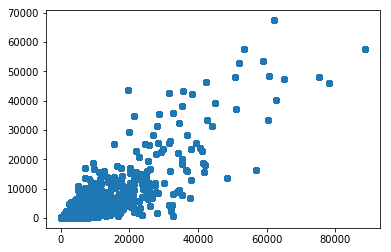

In [12]:
x , y = final.MarkDown1, final.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

In [13]:
#x , y = final.Weekly_Sales, final.CPI
#print(np.corrcoef(x,y))
#plt.scatter(x,y)
                        

In [14]:
#x , y = final.MarkDown2, final.MarkDown1
#print(np.corrcoef(x,y))
#plt.scatter(x,y)

# Initial Model

In [15]:
final.describe(include='all')#' will give you a description of all your coluums data'

,Store,Date,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,97056.000000,97056,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056
unique,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2012-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87064
mean,20.239408,NaN,44.278746,17857.195155,57.348331,3.618946,8841.260245,3693.532392,1816.629491,4025.923108,5310.830581,174.766754,7.414578,NaN
std,12.037946,NaN,30.119460,24732.104674,18.263734,0.280003,9258.091154,10058.901796,10989.284083,7173.060535,6535.397883,39.652638,1.708319,NaN
min,1.000000,NaN,1.000000,-1699.000000,7.460000,3.031000,32.500000,-265.760000,-29.100000,0.460000,170.640000,129.816710,4.077000,NaN
25%,10.000000,NaN,19.000000,2763.892500,42.750000,3.413000,3600.790000,47.550000,5.400000,605.880000,2383.670000,136.856419,6.392000,NaN
50%,20.000000,NaN,37.000000,8622.160000,57.950000,3.630000,6264.180000,192.000000,30.460000,1739.830000,3864.600000,189.194056,7.280000,NaN
75%,29.000000,NaN,72.000000,22740.542500,72.660000,3.820000,10333.240000,2551.320000,123.420000,4082.990000,6197.530000,219.355063,8.256000,NaN


In [16]:
#import sklearn to make linear regression models


In [17]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
         'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work we took out markdown 4 
#                                                      cause it was a perfect 1.0 so it was perfectly correlated

y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')


R^2 model score: 0.03473682576876025 



In [18]:
#need to make sure the data makes sense like store #, tempurature, IsHoliday even though its a number it doest fit into model 
#need to use dummy variables to chage numbers and catagories into numbers that make sense 

# Dummy Variables, Evaluation & Feature Engineering 

In [19]:
#pd.get_dummies(final.Store).head()# makes a numeric value "make sense" since it changes the store numbers
# to dummy numeric numbers so it can run through an analysis correctly

In [20]:
final.columns # shows you all the columns in your combined dataframe called final

Index(['Store', 'Date', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Estimated_Weekly_Sales'],
      dtype='object')

In [21]:
for col in ['Store', 'Dept']:# makes a bunch of colums into numeric "dummy" values at the same time
    final[col] = final[col].astype(str) #Make nonumeric
NewX = pd.get_dummies(final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday']])

In [22]:
NewX.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,IsHoliday,Store_1,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
6587,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,False,1,...,0,0,0,0,0,0,0,0,0,0
6588,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,False,1,...,0,0,0,0,0,0,0,0,0,0
6589,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,False,1,...,0,0,0,0,0,0,0,0,0,0
6590,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,False,1,...,0,0,0,0,0,0,0,0,0,0
6591,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,False,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
final.IsHoliday = final.IsHoliday.map({True:1, False:0})# convert category into numeric so IsHoliday column can be use in analysis
final.IsHoliday.value_counts()

0    87064
1     9992
Name: IsHoliday, dtype: int64

In [24]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
#Removed all markdown
X = NewX
y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Save results
new_weight_dict = dict(zip(X.columns, linreg.coef_))

#Print the coefficients for the model's formula, shows you the "weight"
 #                      of your data to see whats good to use or not 
print('Model feature coefficients:')
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.6814789782658253 

Model feature coefficients:
Temperature Coefficient weight: -4.3264
Fuel_Price Coefficient weight: -2795.6944
MarkDown1 Coefficient weight: -0.0237
MarkDown2 Coefficient weight: -0.0789
MarkDown3 Coefficient weight: 0.0745
MarkDown5 Coefficient weight: -0.0122
CPI Coefficient weight: -293.0222
Unemployment Coefficient weight: 1127.6705
IsHoliday Coefficient weight: 710.5935
Store_1 Coefficient weight: 21556.2691
Store_10 Coefficient weight: 1147.956
Store_11 Coefficient weight: 20112.5936
Store_12 Coefficient weight: -16195.5983
Store_13 Coefficient weight: 3192.806
Store_14 Coefficient weight: 16332.3281
Store_15 Coefficient weight: -16958.717
Store_16 Coefficient weight: 312.9134
Store_17 Coefficient weight: -13272.0332
Store_18 Coefficient weight: -10471.4477
Store_19 Coefficient weight: -4994.6222
Store_2 Coefficient weight: 26939.4036
Store_20 Coefficient weight: 28430.2893
Store_21 Coefficient weight: 9762.7127
Store_22 Coefficient weight: -9

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [27]:
X.shape, y.shape# shows the number of rows used in y shape  (columns should usaully be less then rows we have 135 and 97056 rows)

((97056, 135), (97056,))

In [28]:
X_train.shape, X_test.shape # shows the number of columns matched from above 

((72792, 135), (24264, 135))

In [29]:
y_train.shape, y_test.shape # shows the train and test match above train and test rows

((72792,), (24264,))

# Linear Regression

In [30]:
#choosing themodel
mod=LinearRegression()
mod.fit(X_train, y_train)

#Predicting
y_hat_train=mod.predict(X_train)
y_hat_test=mod.predict(X_test)

#Calculating (and choose) Error
train_mse= np.sqrt(mean_squared_error(y_train,y_hat_train))
test_mse= np.sqrt(mean_squared_error(y_test,y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error', test_mse)


Train Mean Squared Error: 13900.198421272891
Test Mean Squared Error 14143.526469311657


In [31]:
# the model is good if the test error and train error # are close to each other 
# and train error is low

# Further Evaluation & Feature Engineering 

# Kfolds

In [32]:
from sklearn.model_selection import KFold

In [33]:
kf = KFold(n_splits=10, shuffle=True)

In [34]:
for train_index, test_index in kf.split(final):
    print('train index:', train_index, len(train_index))
    print('test index:', test_index, len(test_index))
    print()

train index: [    0     1     2 ... 97053 97054 97055] 87350
test index: [   22    30    44 ... 97016 97023 97044] 9706

train index: [    0     1     2 ... 97053 97054 97055] 87350
test index: [    5    11    14 ... 97037 97045 97052] 9706

train index: [    0     1     2 ... 97052 97053 97054] 87350
test index: [    4    10    12 ... 97035 97048 97055] 9706

train index: [    0     2     3 ... 97053 97054 97055] 87350
test index: [    1     9    53 ... 97027 97028 97040] 9706

train index: [    0     1     2 ... 97053 97054 97055] 87350
test index: [    3     6    24 ... 97026 97043 97051] 9706

train index: [    0     1     2 ... 97053 97054 97055] 87350
test index: [    8    15    66 ... 97012 97047 97050] 9706

train index: [    0     1     3 ... 97052 97053 97055] 87351
test index: [    2    17    45 ... 97034 97042 97054] 9705

train index: [    1     2     3 ... 97052 97054 97055] 87351
test index: [    0    20    35 ... 97041 97046 97053] 9705

train index: [    0     1     2 

In [35]:
X_feat =['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                'MarkDown5', 'CPI', 'Unemployment', 'Dept']
y_feat =['Weekly_Sales']


In [36]:
final = final.reset_index(drop=True) #need to reset the columuns or we run into an error

In [37]:
rmse_df = pd.DataFrame(columns=['fold', 'train', 'test'])

for fold, (train_index, test_index) in enumerate(kf.split(final)):
    X_tr = final.loc[train_index, X_feat]
    y_tr = final.loc[train_index, y_feat]
    X_te = final.loc[test_index, X_feat]
    y_te = final.loc[test_index, y_feat]
    #Similar: X_tr, y_tr, X_te, y_te = train_test_split(......)
    
    print(X_tr.shape, y_tr.shape)
    print(X_te.shape, y_te.shape)
    print()
    

    mod = LinearRegression()
    mod.fit(X_tr, y_tr)
    
    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr)))
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))
    
    tmp_df = pd.DataFrame({'fold': [fold], 'train': [rmse_tr], 'test': [rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87350, 10) (87350, 1)
(9706, 10) (9706, 1)

(87351, 10) (87351, 1)
(9705, 10) (9705, 1)

(87351, 10) (87351, 1)
(9705, 10) (9705, 1)

(87351, 10) (87351, 1)
(9705, 10) (9705, 1)

(87351, 10) (87351, 1)
(9705, 10) (9705, 1)



C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


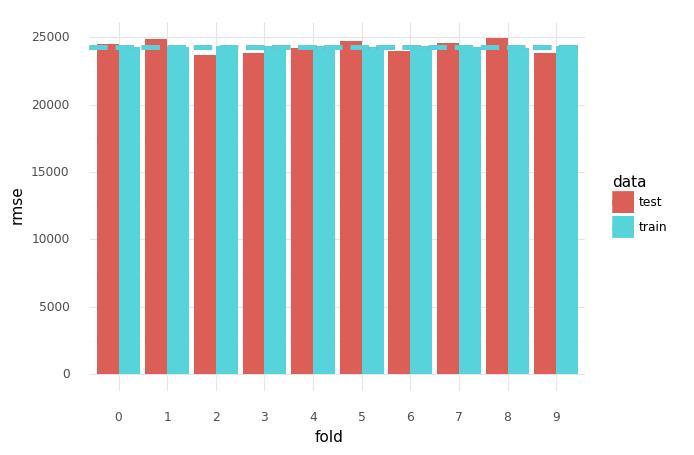

<ggplot: (170230388919)>

In [38]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
        )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)

# Normilization

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
#normailzation is trying to make all the data be on the same scale

In [40]:
features = [col for col in final.columns if final[col].dtype in [np.float64, np.int64] and col not in ['Weekly_Sales','Estimated_Weekly_Sales']]

print(features)

['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [41]:
final[features].columns

Index(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [42]:
#features = [col for col in final.columns if final[col].dtype in [np.float64, np.int64] and col!=['Weekly_Sales']
F = final[features]
#Impute null values
for col in F:
    avg = F[col].mean()
    F[col] = F[col].fillna(value=avg)
y = final.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(F,y)
ols = LinearRegression(normalize=True)
ols.fit(X_train, y_train)
print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ols.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ols.predict(X_test)))

Training r^2: 0.014957154372621904
Testing r^2: 0.010649895487422678
Training MSE: 612446315.9226809
Testing MSE: 575127863.6874076


In [43]:
X_train.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
22551,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,0
91728,37.21,3.095,6453.63,22866.83,126.87,2582.41,4266.94,196.545831,6.589,0
12025,85.06,3.407,2696.67,7.75,0.36,3104.68,2152.23,222.529723,5.603,0
74125,76.57,3.610,1142.93,212.35,8.11,368.45,1625.35,138.233193,9.419,0
56524,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,0


# lasso Ridge


In [44]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [46]:
L1 = Lasso() #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, L1.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, L1.predict(X_test)))

Training r^2: 0.014957098650508429
Testing r^2: 0.010651048980979239
Training MSE: 612446350.5676744
Testing MSE: 575127193.1398613


In [47]:
L1 = Lasso(alpha=100) #if ou decide to use lasso you must choose an alpha value
#       you can change around the alpha to see whats a good fit of testing mse and training mse , 
#       if alpha is too small it looks like linear regression
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, L1.predict(X_train))/100000)#also dont forget to insert a value here 
#                                                                               (doest have to be same as alphait here
print('Testing MSE:', mean_squared_error(y_test, L1.predict(X_test))/100000)# and also insert value here

Training r^2: 0.014557063496361544
Testing r^2: 0.010342462829046608
Training MSE: 6126.95070770541
Testing MSE: 5753.065800864185


In [48]:
# if you dont want to guess what vsalue of alpha you should use ou van try lassoCV

In [49]:
L1 = LassoCV(normalize=True) #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
print('Best alpha:', L1.alpha_)

Training r^2: 0.014957023777824598
Testing r^2: 0.010651797764371973
Training MSE: 24747.6543761112
Testing MSE: 23981.800554961705
Best alpha: 0.006307044904235474


In [50]:
import warnings
from plotnine import *

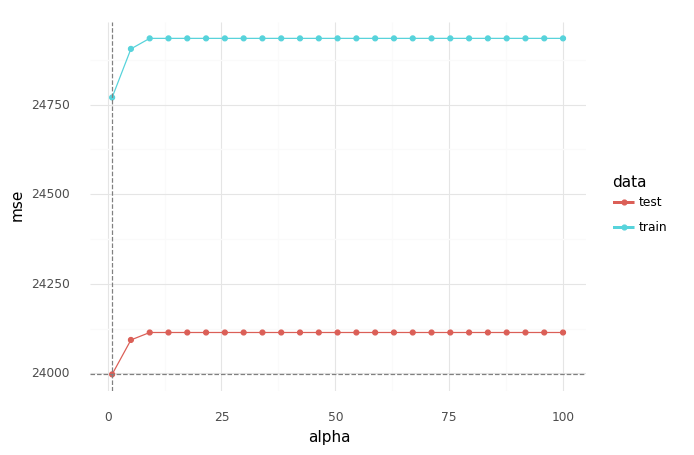

<ggplot: (170228741952)>

In [51]:
alphas = []
mse_tr = []
mse_te = []
for alpha in np.linspace(start=1, stop=100, num=25):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        L1 = Lasso(alpha=alpha, normalize=True)
        L1.fit(X_train, y_train)
    mse_tr.append(np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
    mse_te.append(np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
    alphas.append(alpha)
    
mse_df = (pd.DataFrame({'alpha': alphas, 'train': mse_tr, 'test': mse_te})
          .assign(min_point = lambda d: d['test'].min())
          .assign(min_point = lambda d: d.apply(lambda x: 1 if x['test'] == x['min_point'] else 0, axis=1))
          .melt(id_vars=['alpha', 'min_point'], var_name='data', value_name='mse')
         )
min_alpha = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'alpha'].values[0]
min_mse = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'mse'].values[0]

(ggplot(mse_df, aes(x='alpha', y='mse', color='data'))
 + geom_line() + geom_point() 
 + geom_vline(xintercept=min_alpha, linetype='--', color='gray')
 + geom_hline(yintercept=min_mse, linetype='--', color='gray')
 + geom_text(x=min_alpha + 10, y=min_mse - 1000,
             label='alpha: {}, rmse: {}'.format(min_alpha.round(2).astype(str), min_mse.round(2).astype(str)),
             color='black'
            )
 + theme_minimal()
)

In [52]:
#you can also use ridge cv

In [53]:
L2 = RidgeCV(normalize=True) #Lasso is also known as the L1 norm.
L2.fit(X_train, y_train)
print('Training r^2:', L2.score(X_train, y_train))
print('Testing r^2:', L2.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L2.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L2.predict(X_test))))
print('Best alpha:', L2.alpha_)

Training r^2: 0.014669833719930137
Testing r^2: 0.010776471005062516
Training MSE: 24751.26171229185
Testing MSE: 23980.28946766955
Best alpha: 0.1


In [54]:
final.describe(include='all')#' will give you a description of all your coluums data'

,Store,Date,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Estimated_Weekly_Sales
count,97056,97056,97056,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000
unique,45,48,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20,2012-02-03,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3152,2883,1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,17857.195155,57.348331,3.618946,8841.260245,3693.532392,1816.629491,4025.923108,5310.830581,174.766754,7.414578,0.102951,17857.195155
std,NaN,NaN,NaN,24732.104674,18.263734,0.280003,9258.091154,10058.901796,10989.284083,7173.060535,6535.397883,39.652638,1.708319,0.303896,20416.782756
min,NaN,NaN,NaN,-1699.000000,7.460000,3.031000,32.500000,-265.760000,-29.100000,0.460000,170.640000,129.816710,4.077000,0.000000,-18068.830379
25%,NaN,NaN,NaN,2763.892500,42.750000,3.413000,3600.790000,47.550000,5.400000,605.880000,2383.670000,136.856419,6.392000,0.000000,3767.051507
50%,NaN,NaN,NaN,8622.160000,57.950000,3.630000,6264.180000,192.000000,30.460000,1739.830000,3864.600000,189.194056,7.280000,0.000000,13060.158782
75%,NaN,NaN,NaN,22740.542500,72.660000,3.820000,10333.240000,2551.320000,123.420000,4082.990000,6197.530000,219.355063,8.256000,0.000000,26050.828960


# GridSearchCV

In [55]:
# or gridsearchcv is doing cross validation for each parameter you try 
# and choosing the best parameters for you 

Automatically created module for IPython interactive environment
Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


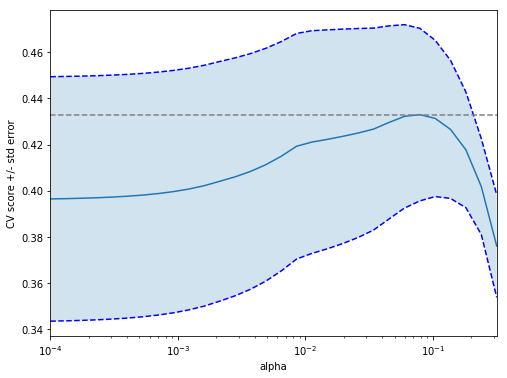

In [56]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

In [57]:
clf.best_params_

{'alpha': 0.07880462815669913}

In [58]:
clf.estimator

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)